# Gaussian Noise

The purpose of this is to show the RMS values of noise sources add as expected in terms of power rather than amplitude.  The context of this example is depicting the total input noise of an op-amp amplifier having a given noise and a source resistance with its appropriate thermal noise.  Since we are not interested in the DC component of either of these for our purposes here, we will assume that both distributions have a mean of zero.  It is useful to note that not all of the graphical representations of the noise presented here make sense in practice; you would not have access to the signal representing the amplifier noise alone since this measurement implies having gain set by the resistance that is also contributing noise.

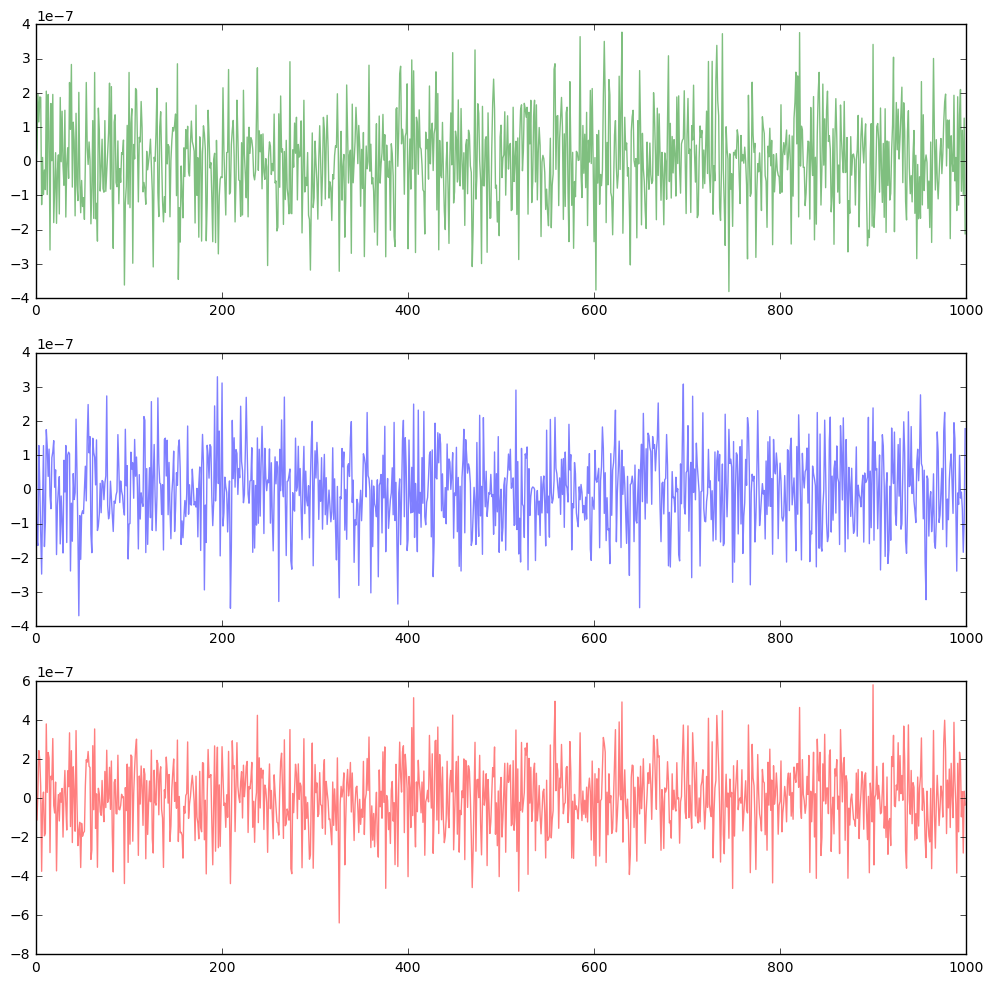

RMS 1: 1.3066771108e-07
RMS 2: 1.15951793172e-07
RMS 3: 1.7741232427e-07 (from data)
RMS 3: 1.74696505571e-07 (computed)


In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,12))

# Input resistance noise (50 ohms at 20 degrees Celsius, 20KHz bandwidth)
n1 = [np.random.normal(0, 1.27e-7) for i in range(1000)]
plt.subplot(3, 1, 1)
plt.plot(n1, color='g', alpha=0.5)
rms1 = np.std(n1)

# Op-amp input noise (LT1028 nominal specification, 20KHz bandwidth)
n2 = [np.random.normal(0, 1.2e-7) for i in range(1000)]
plt.subplot(3, 1, 2)
plt.plot(n2, color='b', alpha=0.5)
rms2 = np.std(n2)

# Total amplifier input noise
n3 = [n1[i] + n2[i] for i in range(1000)]
plt.subplot(3, 1, 3)
plt.plot(n3, color='r', alpha=0.5)
rms3 = np.std(n3)

# Plot the various noises
plt.show()

# Compute the RMS noise (as opposed to add our two sampled measurements pointwise)
rms4 = math.sqrt(rms1**2 + rms2**2)

# Print the computed RMS values
print("RMS 1: " + str(rms1))
print("RMS 2: " + str(rms2))
print("RMS 3: " + str(rms3) + " (from data)")
print("RMS 3: " + str(rms4) + " (computed)")


As you can see, the value computed analytically from the first two measurements is in accord with the value computed from the data when evaluated as a pointwise sum.  We will see in the [Noise Calculation](NoiseCalculation.ipynb) notebook how we can back-figure the result for the device under test noise given the total measured noise of the system.